In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data from csv
data = pd.read_csv("USA_Housing.csv")

### Perform EDA to have a statistical summarization on the characteristics underlying the dataset

In [4]:
#check out first five rows to have a concept of the dataset - what is it about together with its features
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
#see null counts + data type per each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Data Preprocessing

In [10]:
data.Address

0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 5000, dtype: object

Currently, we might not need Address as our analytical feature so we gonna drop it for simplicity. However, this could be a very valuable feature as the house prices rely strongly on their location by city/state

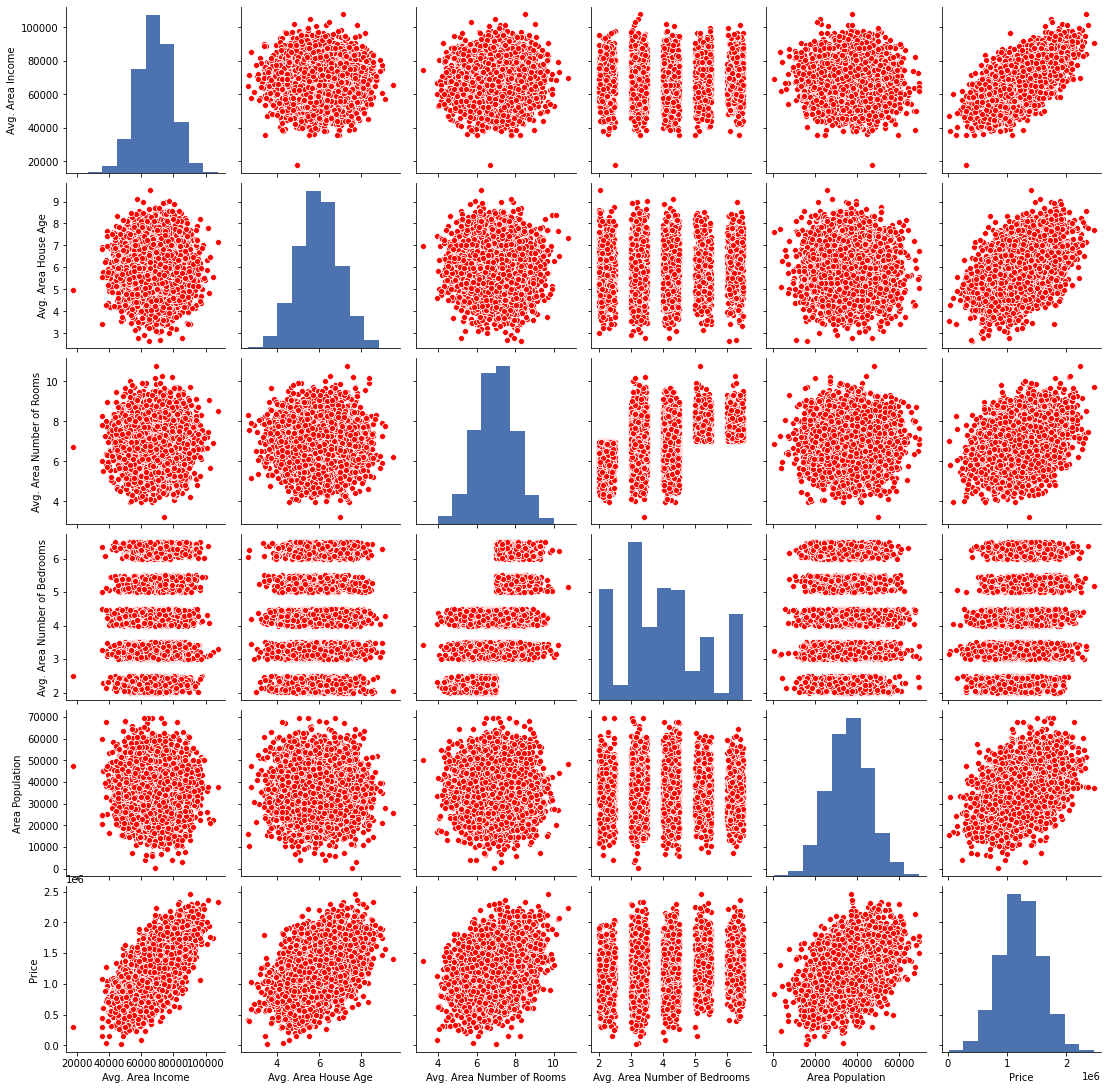

In [27]:
sns.set_color_codes("dark")
sns.pairplot(data, plot_kws={"color":'red'})

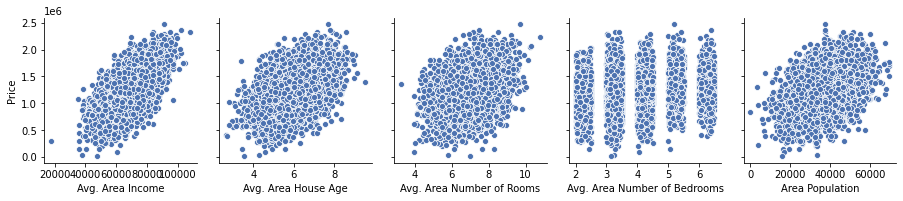

In [40]:
#plot each column agaisnt label y
sns.pairplot(data, x_vars=data.columns[:-2], y_vars="Price", diag_kws={"size":"30"})

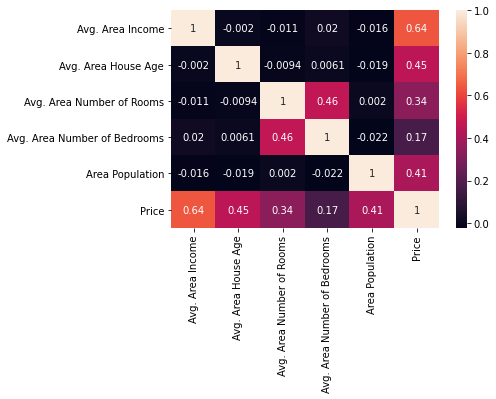

columns of columns' correlation with y:
Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64


In [55]:
#use heatmap to clearly show the correlation
sns.heatmap(data.corr(), annot=True)
plt.show()
#columns of columns' correlation with y
print("columns of columns' correlation with y:\n%s"%(data.corr().Price.sort_values(ascending=False)))

<AxesSubplot:xlabel='Price'>

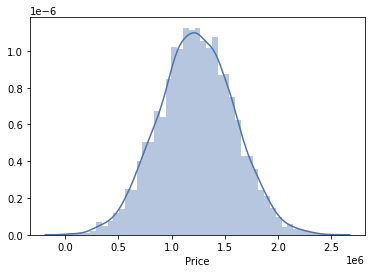

In [60]:
#distribution of price y
sns.distplot(data.Price)

### Data Preprocessing

In [99]:
#data standardization
import sklearn.preprocessing as preprocessing

standardizer = preprocessing.StandardScaler()

#assign feature variables into X
X = data.iloc[:, :-2].values
y = data.iloc[:, -2].values

#fit X into standardizer to obtain X_processed
X_processed = standardizer.fit_transform(X)

In [100]:
from sklearn.model_selection import train_test_split

#split dataset into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=42)

In [115]:
#check size splitted sets
print("X_train: %s \ny_train: %s \nX_test: %s \ny_test: %s"%(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train: (4000, 5) 
y_train: (4000,) 
X_test: (1000, 5) 
y_test: (1000,)


### Model fitting

We are going to use a Multivariate Linear Regression model for fitting

In [117]:
from sklearn.linear_model import LinearRegression as LR

In [121]:
#assign the model class the to object lr 
lr = LR()
#fit the model to training sets
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
#print intercept and slope
print("intercept: {}\nparameters: {}".format(lr.intercept_, lr.coef_))

intercept: -2635072.9009330906
parameters: [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


In [140]:
#predict the price of test set prior to comparison between predicted and actual values from test set
y_pred = lr.predict(X_test)

### Model perforamance evaluation

In [143]:
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
mse = mean_squared_error(y_test, y_pred)

In [149]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.9179971706834329


Though interpretability of our model is high, the squared error shows that we need to improve our model much more

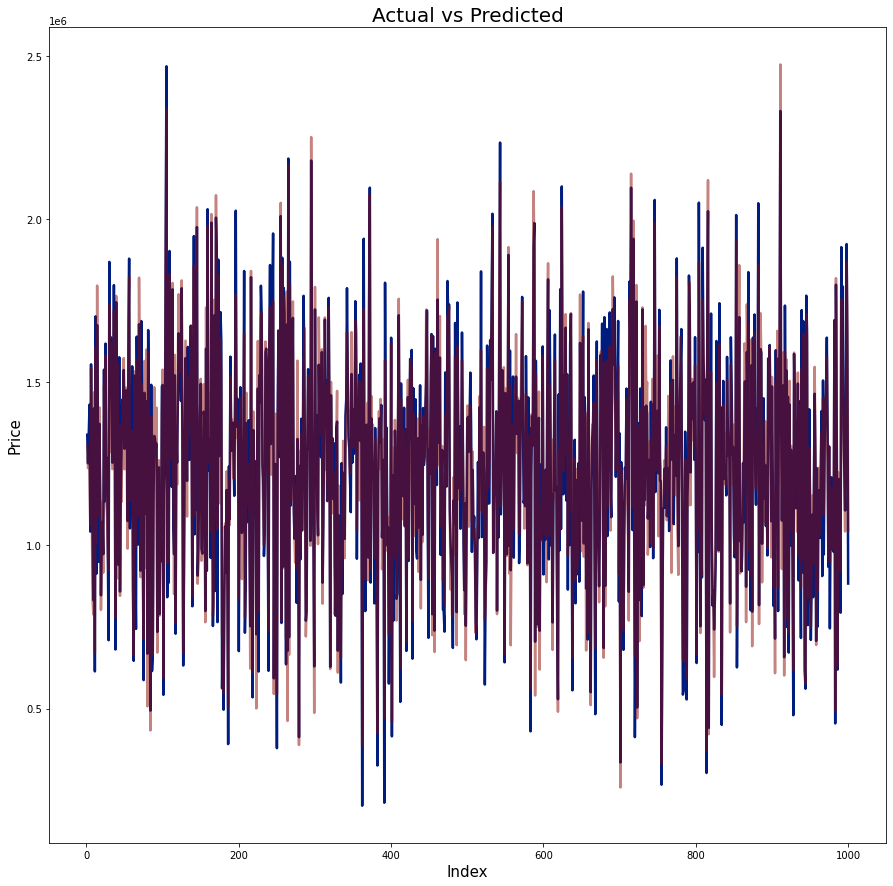

In [167]:
index = [c for c in range(1, y_test.size + 1)]
plt.figure(figsize=(15, 15))
plt.plot(index, y_test, 'b-', lw=2.5)
plt.plot(index, y_pred, 'r-', alpha=0.5, lw=2.5)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Actual vs Predicted', fontsize=20)
plt.show()